In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data

In [2]:
df = pd.read_excel(r"/content/Supermarket transaction.xlsx")

df

,Transaction,Purchase Date,Customer ID,Gender,Marital Status,Homeowner,Children,Annual Income,City,State or Province,Country,Product Family,Product Department,Product Category,Units Sold,Revenue
0,1,2011-12-18,7223,F,S,Y,2,$30K - $50K,Los Angeles,CA,USA,Food,Snack Foods,Snack Foods,5,27.38
1,2,2011-12-20,7841,M,M,Y,5,$70K - $90K,Los Angeles,CA,USA,Food,Produce,Vegetables,5,14.90
2,3,2011-12-21,8374,F,M,N,2,$50K - $70K,Bremerton,WA,USA,Food,Snack Foods,Snack Foods,3,5.52
3,4,2011-12-21,9619,M,M,Y,3,$30K - $50K,Portland,OR,USA,Food,Snacks,Candy,4,4.44
4,5,2011-12-22,1900,F,S,Y,3,$130K - $150K,Beverly Hills,CA,USA,Drink,Beverages,Carbonated Beverages,4,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,14055,2013-12-29,9102,F,M,Y,2,$10K - $30K,Bremerton,WA,USA,Food,Baking Goods,Baking Goods,3,9.64
14055,14056,2013-12-29,4822,F,M,Y,3,$10K - $30K,Walla Walla,WA,USA,Food,Frozen Foods,Vegetables,3,7.45
14056,14057,2013-12-31,250,M,S,Y,1,$30K - $50K,Portland,OR,USA,Drink,Beverages,Pure Juice Beverages,4,3.24
14057,14058,2013-12-31,6153,F,S,N,4,$50K - $70K,Spokane,WA,USA,Drink,Dairy,Dairy,2,4.00


# **Data Preprocessing **

In [3]:
# Remove rows where the year is 2011
df = df[df['Purchase Date'].dt.year != 2011]

In [4]:
# Check for missing values
df.isnull().sum()

Transaction           0
Purchase Date         0
Customer ID           0
Gender                0
Marital Status        0
Homeowner             0
Children              0
Annual Income         0
City                  0
State or Province     0
Country               0
Product Family        0
Product Department    0
Product Category      0
Units Sold            0
Revenue               0
dtype: int64

In [5]:
# fill the null with 'unknown'
df['State or Province'].fillna('Unknown', inplace=True)

<ipython-input-5-76c185fe7eef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State or Province'].fillna('Unknown', inplace=True)


In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

<ipython-input-6-0404d6fd6973>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


# **Sales Trends Analysis**

In [7]:
# Sales Trends Analysis
# Convert 'Purchase Date' to datetime if it's not already
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

<ipython-input-7-2cf277a146b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])


In [8]:
# Extract year and month from 'Purchase Date'
df['Year'] = df['Purchase Date'].dt.year
df['Month'] = df['Purchase Date'].dt.month

<ipython-input-8-855d53951962>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Purchase Date'].dt.year
<ipython-input-8-855d53951962>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Purchase Date'].dt.month


<Figure size 1000x600 with 0 Axes>

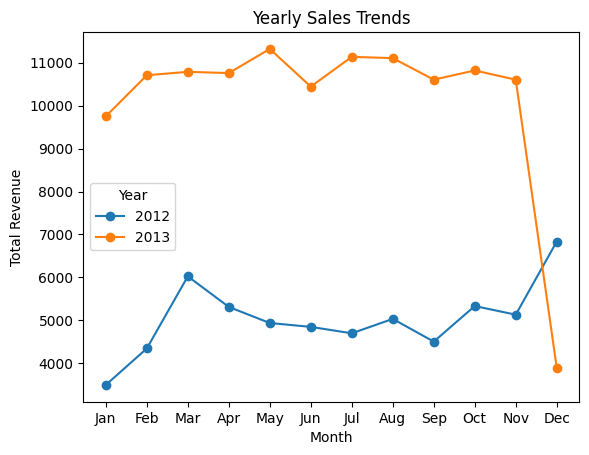

In [9]:
# Plotting sales trends over different years
yearly_sales = df.groupby(['Year', 'Month'])['Revenue'].sum().unstack(level=0)

plt.figure(figsize=(10, 6))
yearly_sales.plot(marker='o', xlabel='Month', ylabel='Total Revenue', title='Yearly Sales Trends')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

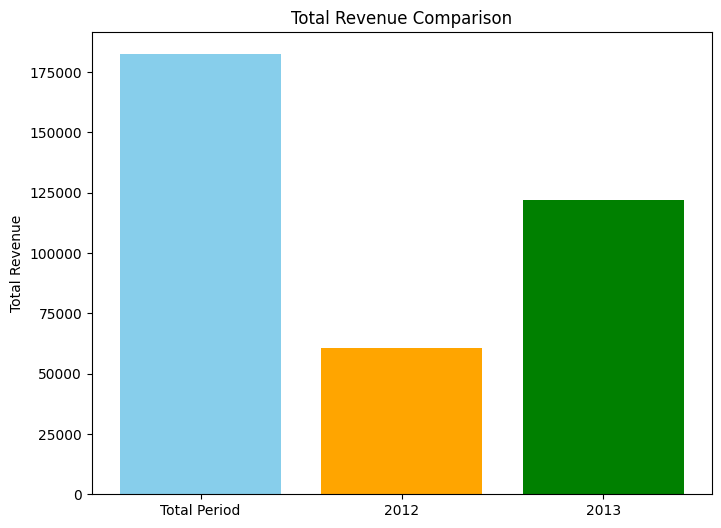

In [22]:
# Total Revenue for the Total Period
total_revenue_total_period = df['Revenue'].sum()

# Filter data for 2012 and 2013
df_2012 = df[df['Year'] == 2012]
df_2013 = df[df['Year'] == 2013]

# Total Revenue for 2012 and 2013
total_revenue_2012 = df_2012['Revenue'].sum()
total_revenue_2013 = df_2013['Revenue'].sum()

import matplotlib.pyplot as plt

labels = ['Total Period', '2012', '2013']
total_revenue_values = [total_revenue_total_period, total_revenue_2012, total_revenue_2013]

plt.figure(figsize=(8, 6))

plt.bar(labels, total_revenue_values, color=['skyblue', 'orange', 'green'])
plt.title('Total Revenue Comparison')
plt.ylabel('Total Revenue')

plt.show()

<Figure size 1000x600 with 0 Axes>

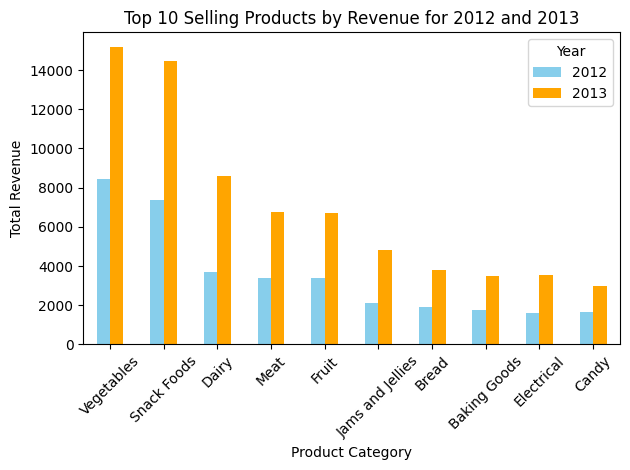

In [11]:
# Filter data for 2012 and 2013
df_2012_2013 = df[df['Year'].isin([2012, 2013])]

# Calculate top-selling products for both years
top_products_yearly = df_2012_2013.pivot_table(index='Product Category', columns='Year', values='Revenue', aggfunc='sum')
top_products_yearly = top_products_yearly.fillna(0)  # Fill NaN values with 0 for missing categories in a year

# Sort the products by total revenue for both years combined
top_products_yearly['Total'] = top_products_yearly.sum(axis=1)
top_products_yearly = top_products_yearly.sort_values(by='Total', ascending=False).head(10)

# Plot top-selling products for both years in one chart
plt.figure(figsize=(10, 6))
top_products_yearly.drop('Total', axis=1).plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Top 10 Selling Products by Revenue for 2012 and 2013')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()




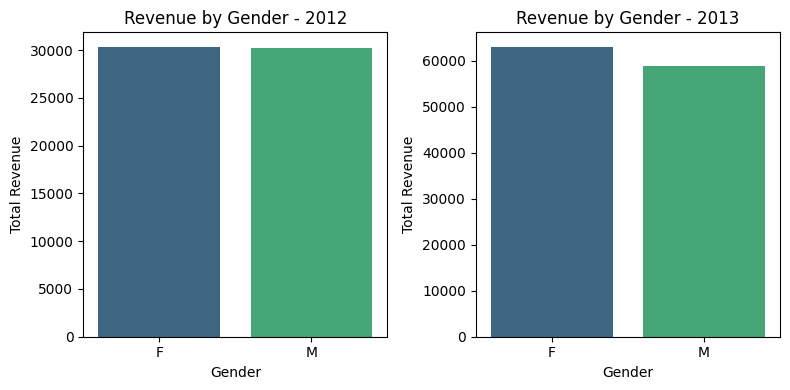

In [23]:
# Filter data for 2012 and 2013
df_2012 = df[df['Year'] == 2012]
df_2013 = df[df['Year'] == 2013]

# Customer Segmentation by Gender for 2012 and 2013
gender_segmentation_2012 = df_2012.groupby('Gender')['Revenue'].sum().reset_index()
gender_segmentation_2013 = df_2013.groupby('Gender')['Revenue'].sum().reset_index()

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)  # Subplot for 2012
sns.barplot(x='Gender', y='Revenue', data=gender_segmentation_2012, palette='viridis')
plt.title('Revenue by Gender - 2012')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)  # Subplot for 2013
sns.barplot(x='Gender', y='Revenue', data=gender_segmentation_2013, palette='viridis')
plt.title('Revenue by Gender - 2013')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()


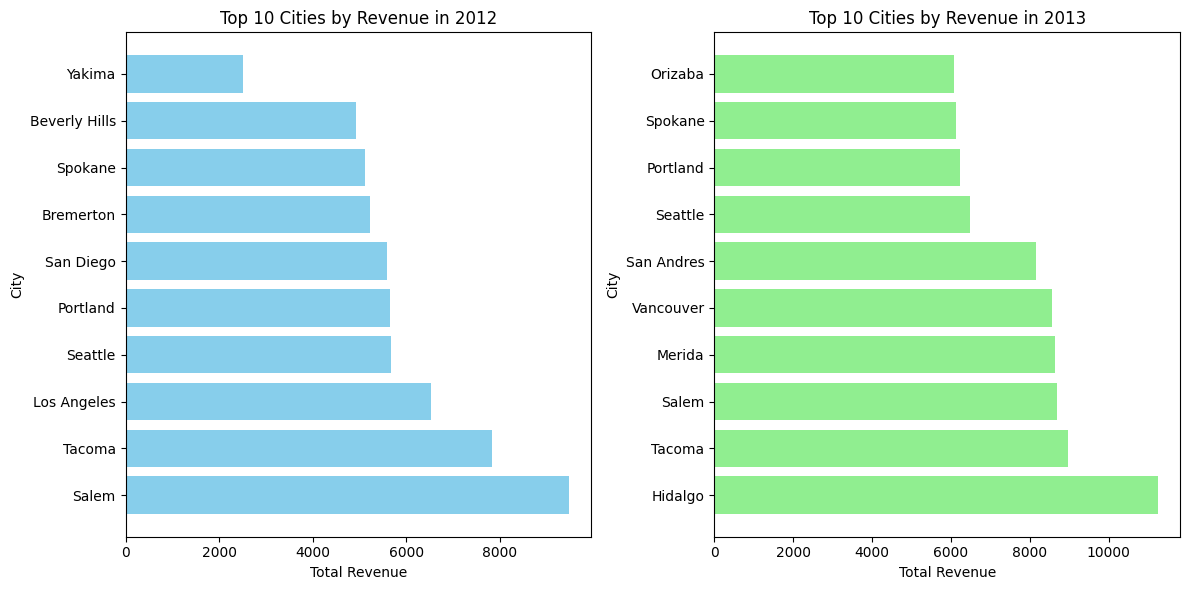

In [16]:
# Regional Sales Analysis by City (Bar Plot)
# Filter data for 2012 and 2013
df_2012 = df[df['Year'] == 2012]
df_2013 = df[df['Year'] == 2013]

# Grouping and calculating revenue for each city in 2012 and 2013
city_sales_2012 = df_2012.groupby('City')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()
city_sales_2013 = df_2013.groupby('City')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot for 2012
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for 2012
plt.barh(city_sales_2012['City'], city_sales_2012['Revenue'], color='skyblue')
plt.title('Top 10 Cities by Revenue in 2012')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()

# Plot for 2013
plt.subplot(1, 2, 2)  # Subplot for 2013
plt.barh(city_sales_2013['City'], city_sales_2013['Revenue'], color='lightgreen')
plt.title('Top 10 Cities by Revenue in 2013')
plt.xlabel('Total Revenue')
plt.ylabel('City')
plt.tight_layout()

plt.show()


In [17]:
# Product Mix Analysis by Product Category
product_mix_2012 = df[df['Year'] == 2012].groupby('Product Category')['Revenue'].sum().sort_values(ascending=False)
print(product_mix_2012)


Product Category
Vegetables              8427.37
Snack Foods             7385.95
Dairy                   3682.21
Meat                    3399.92
Fruit                   3397.58
Jams and Jellies        2128.83
Bread                   1909.84
Baking Goods            1736.19
Frozen Desserts         1688.01
Candy                   1652.93
Electrical              1601.59
Beer and Wine           1461.80
Bathroom Products       1383.77
Breakfast Foods         1332.35
Canned Soup             1316.80
Kitchen Products        1304.41
Starchy Foods           1297.43
Paper Products          1234.09
Specialty               1087.09
Cleaning Supplies        983.74
Magazines                980.99
Hot Beverages            906.99
Pizza                    846.49
Eggs                     810.30
Pain Relievers           766.91
Pure Juice Beverages     754.50
Hygiene                  708.89
Drinks                   656.78
Side Dishes              623.56
Frozen Entrees           552.03
Carbonated Beverages   

In [18]:
product_mix_2013 = df[df['Year'] == 2013].groupby('Product Category')['Revenue'].sum().sort_values(ascending=False)
print(product_mix_2013)


Product Category
Vegetables              15166.33
Snack Foods             14464.58
Dairy                    8599.47
Meat                     6754.35
Fruit                    6717.77
Jams and Jellies         4813.05
Bread                    3783.95
Electrical               3518.35
Baking Goods             3480.68
Breakfast Foods          3302.61
Canned Soup              3260.22
Beer and Wine            3171.88
Paper Products           3146.39
Candy                    2997.34
Bathroom Products        2884.14
Starchy Foods            2583.43
Specialty                2526.35
Frozen Desserts          2509.96
Hot Beverages            2190.87
Pain Relievers           1961.65
Eggs                     1951.67
Kitchen Products         1834.86
Magazines                1628.77
Pizza                    1623.20
Plastic Products         1547.97
Cleaning Supplies        1455.76
Drinks                   1325.74
Hardware                 1286.30
Carbonated Beverages     1279.19
Hygiene                  1

In [19]:
# Inventory Analysis - Inventory Turnover
inventory_analysis_2012 = df[df['Year'] == 2012].groupby('Product Category')['Units Sold'].sum() / df[df['Year'] == 2012].groupby('Product Category')['Units Sold'].count()
print(inventory_analysis_2012)



Product Category
Baking Goods            4.018182
Bathroom Products       3.952381
Beer and Wine           4.017544
Bread                   4.115942
Breakfast Foods         4.109375
Candles                 4.066667
Candy                   4.041667
Canned Anchovies        4.000000
Canned Clams            4.466667
Canned Oysters          3.100000
Canned Sardines         4.071429
Canned Shrimp           4.000000
Canned Soup             3.798387
Canned Tuna             4.058824
Carbonated Beverages    4.122449
Cleaning Supplies       4.068493
Cold Remedies           3.966667
Dairy                   4.055762
Decongestants           4.034483
Drinks                  4.047619
Eggs                    4.035714
Electrical              3.915094
Frozen Desserts         4.227642
Frozen Entrees          3.829268
Fruit                   4.187023
Hardware                4.314286
Hot Beverages           3.905405
Hygiene                 4.000000
Jams and Jellies        4.075676
Kitchen Products        4.

In [20]:
inventory_analysis_2013 = df[df['Year'] == 2013].groupby('Product Category')['Units Sold'].sum() / df[df['Year'] == 2013].groupby('Product Category')['Units Sold'].count()
print(inventory_analysis_2013)


Product Category
Baking Goods            4.012618
Bathroom Products       4.184100
Beer and Wine           4.141079
Bread                   4.114983
Breakfast Foods         4.017361
Candles                 4.266667
Candy                   4.147826
Canned Anchovies        4.000000
Canned Clams            4.157895
Canned Oysters          4.480000
Canned Sardines         4.000000
Canned Shrimp           4.185185
Canned Soup             4.096774
Canned Tuna             4.173077
Carbonated Beverages    4.115385
Cleaning Supplies       4.260870
Cold Remedies           4.174603
Dairy                   4.164297
Decongestants           4.196429
Drinks                  4.228261
Eggs                    4.098592
Electrical              3.979839
Frozen Desserts         3.930000
Frozen Entrees          4.025974
Fruit                   4.176353
Hardware                4.032258
Hot Beverages           4.072368
Hygiene                 4.206897
Jams and Jellies        4.044665
Kitchen Products        3.